In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

import seaborn as sns; sns.set_theme() 


2022-11-02 11:08:36,229 [11924] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sasha\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\sasha\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



<div class="alert alert-info">

<b>Сегодня</b>
    
<b>Программа семинара № 9: </b>


 Закон больших чисел, ЗБЧ в python.
Сходимости по вероятности.
Центральная предельная теорема, ЦПТ в python.
Типы сходимости.
Квантильное преобразование.
Проклятье размерности.
    
----------------------------------
    
<b>Программа семинара № 10: </b>    
    
Метод моментов.
Несмещённость в python.
Состоятельность в python.
Эффективность в python.
Смещение против разброса.
Эффективность оценок.
Продуктовые метрики.
Дельта-метод.

<center>
<img src="./images/roadmap.png" width="700"> 
</center>


# 1.  ЗБЧ - Закон больших чисел. 

**ЗБЧ - говорит о том, что среднее арифметическое большого числа похожих случайных величин "стабилизируется" с ростом их количества**

<center>
<img src="https://www.syl.ru/misc/i/ai/380799/2473410.jpg" width="100"> 
</center>

<center>
<img src="./images/podbrasyvanie-kubikov.png" width="800"> 
</center>


#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.ь

In [5]:
n_obs = 100

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1, 7), size=n_obs) 
x

array([4, 1, 5, 3, 1, 2, 6, 6, 2, 5, 2, 1, 6, 4, 3, 1, 5, 1, 6, 6, 2, 1,
       2, 1, 2, 6, 1, 6, 2, 1, 1, 6, 2, 5, 4, 2, 5, 4, 6, 6, 5, 4, 1, 5,
       5, 1, 4, 5, 2, 5, 6, 2, 5, 2, 6, 5, 4, 2, 2, 2, 5, 1, 4, 5, 6, 4,
       5, 2, 4, 3, 1, 1, 1, 4, 2, 4, 5, 2, 3, 4, 4, 3, 3, 2, 6, 3, 4, 4,
       3, 2, 5, 6, 3, 2, 3, 2, 3, 2, 4, 1])

In [6]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum[:5]

array([ 4,  5, 10, 13, 14], dtype=int32)

In [7]:
np.arange(1, n_obs + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [8]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean

array([4.        , 2.5       , 3.33333333, 3.25      , 2.8       ,
       2.66666667, 3.14285714, 3.5       , 3.33333333, 3.5       ,
       3.36363636, 3.16666667, 3.38461538, 3.42857143, 3.4       ,
       3.25      , 3.35294118, 3.22222222, 3.36842105, 3.5       ,
       3.42857143, 3.31818182, 3.26086957, 3.16666667, 3.12      ,
       3.23076923, 3.14814815, 3.25      , 3.20689655, 3.13333333,
       3.06451613, 3.15625   , 3.12121212, 3.17647059, 3.2       ,
       3.16666667, 3.21621622, 3.23684211, 3.30769231, 3.375     ,
       3.41463415, 3.42857143, 3.37209302, 3.40909091, 3.44444444,
       3.39130435, 3.40425532, 3.4375    , 3.40816327, 3.44      ,
       3.49019608, 3.46153846, 3.49056604, 3.46296296, 3.50909091,
       3.53571429, 3.54385965, 3.51724138, 3.49152542, 3.46666667,
       3.49180328, 3.4516129 , 3.46031746, 3.484375  , 3.52307692,
       3.53030303, 3.55223881, 3.52941176, 3.53623188, 3.52857143,
       3.49295775, 3.45833333, 3.42465753, 3.43243243, 3.41333

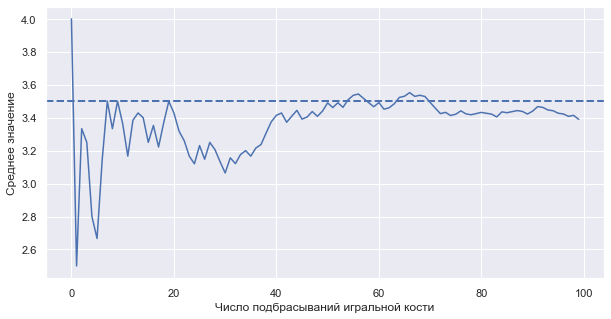

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

# 2. Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

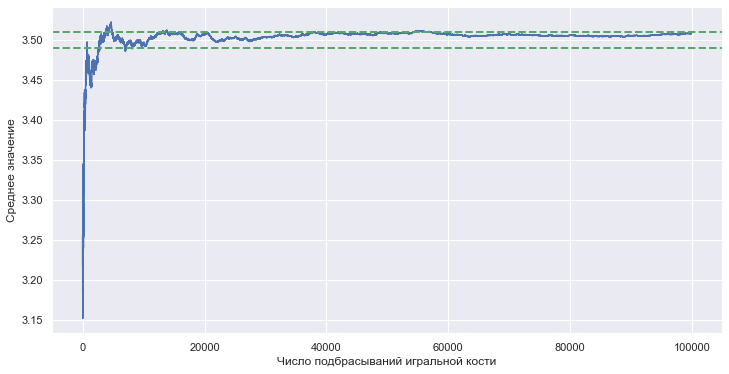

In [11]:
n_obs = 100_000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [3]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

In [4]:
x_cumsum

array([[1.        , 6.        , 1.        , ..., 1.        , 5.        ,
        5.        ],
       [3.        , 4.5       , 1.5       , ..., 3.5       , 3.        ,
        4.5       ],
       [3.33333333, 4.33333333, 2.33333333, ..., 2.66666667, 2.66666667,
        5.        ],
       ...,
       [3.49079816, 3.47509502, 3.49329866, ..., 3.51220244, 3.5       ,
        3.47389478],
       [3.49054905, 3.47524752, 3.49314931, ..., 3.51205121, 3.49994999,
        3.47374737],
       [3.4908    , 3.4751    , 3.4931    , ..., 3.5119    , 3.4999    ,
        3.4737    ]])

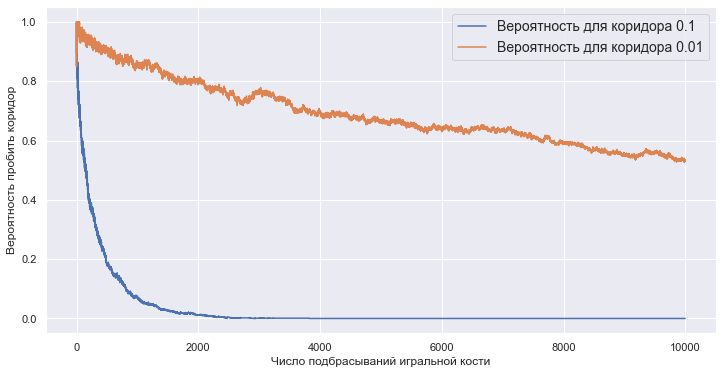

In [5]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 


<center>
<img src="./images/animation_prob_conv.gif" width="1800"> 
</center>

## 3. Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [6]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [7]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

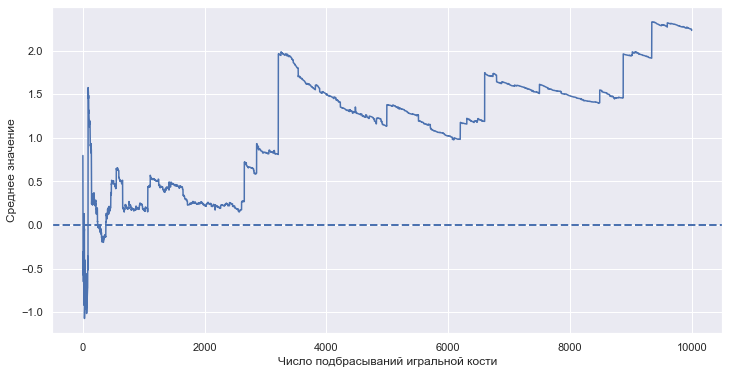

In [23]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

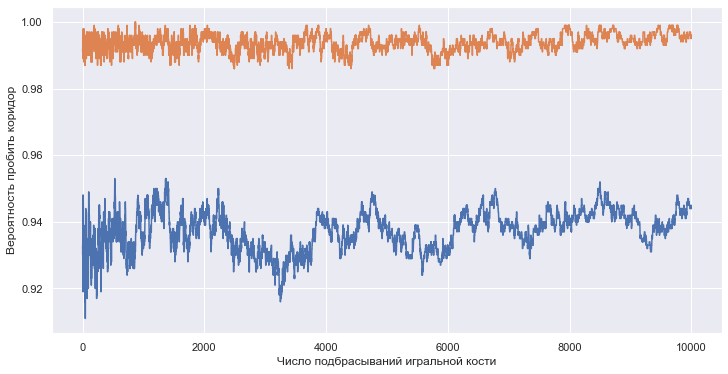

In [8]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="images/animation_prob_unconv.gif" width="1400"> 
</center>

# ЦПТ -Центральная предельная теорема

**ЦПТ - говорит, что сумма достаточно большого числа случайных величин, имеет распределение близкое к нормальному**

<center>
<img src="images/podbrasyvanie_many_kubikov.PNG" width="900"> 
</center>


#### ЦПТ

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


## Упражнение (ЦПТ для равномерного) 

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

In [9]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = sts.uniform(-1, 2) #

In [10]:
x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)
x_4 = uniform_rv.rvs(n_obs)

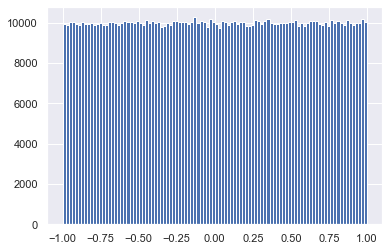

In [11]:
plt.hist(x_1, bins=100); # равномерное распределение

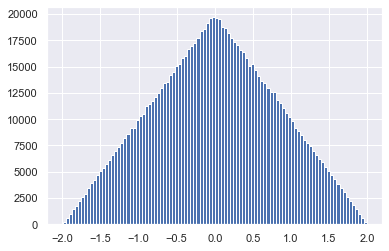

In [12]:
plt.hist(x_1 + x_2, bins=100); # треугольное распределение 

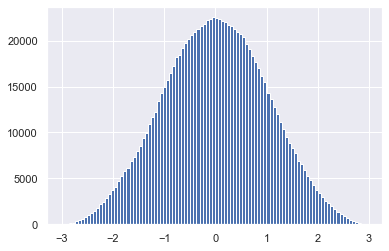

In [13]:
plt.hist(x_1 + x_2 + x_3, bins=100); # уже прослеживается купол

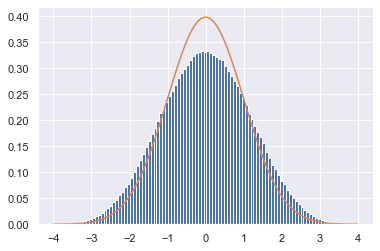

In [14]:
plt.hist(x_1 + x_2 + x_3 + x_4, bins=100, density=True); # ещё куполообразнее

# пририсуем нормальное распределение
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

На практике ЦПТ говорит нам, что при больших значениях $n$ мы можем заменять распределение средних нормальным и не особо сильно при этом ошибаться. 

Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Для равномерного уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$.
 
Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="images/animation_CPT_1.gif" width="350"> 
</center>

А вот пример для хи-квадрат с одной степенью свободы: 

<center>
<img src="images/animation_CPT_2.gif" width="350"> 
</center>

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение.

# 2. Сходимость по распределению

В ЦПТ над мы написали над стрелкой букву $d$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна. Если функции сходятся, она есть. Если не сходятся, её нет.  

__Пример:__ распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \overset{d}{\to}  N(0,1)$.

Давайте это продемонстрируем: 

* Построим на картинке линию: плотность для $N(0,1)$.
* Построим пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделаем то же самое для функций распределения

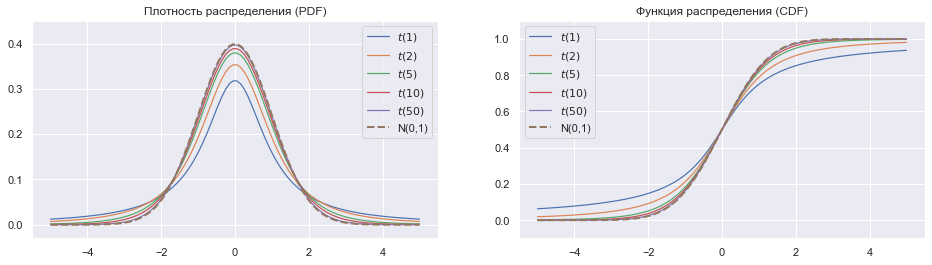

In [15]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же держите гифку. Как же без неё: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_convdist_student.gif" width="1500"> 
</center>

# Типы сходимости

<center>
<img src="images/kind_shodimosty.PNG" width="800"> 
</center>

# Сходимость почти наверное

Последовательность случайных величин $X_1, \dots, X_n, \dots$
**сходится почти наверное (с вероятностью единица)** к случайной величине X, если

$$P(\lim_{n \to -\infty} X_n = X) = 1$$

то есть у последовательности есть предел с вероятностью 1 (Обычно пишут с аббревиатурой п.н.)

**Вспомним, что в сходимости по вероятности у нас предел был перед вероятностью:**

$$\lim_{n \to -\infty}P( X_n = X) = 1$$

Пример, где могла бы быть
<center>
<img src="images/pochti_navernoye.PNG" width="300"> 
</center>

# 1. Квантильное преобразование - или как генерировать распределение


#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет генерировать из равномерного распределения другие 

- Применимо невсегда, напрмер, для нормального распределения используют другие алгоритмы 

<center>
<img src="images/quant.png" height="200"> 
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение.

## Упражнение

Сварить из равномерной случайной величины $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$.

__Решение:__

Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так: 

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$

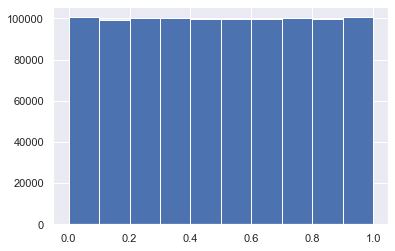

In [16]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)
plt.hist(y);

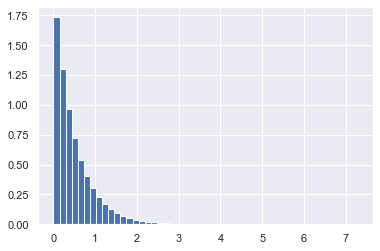

In [17]:
x = -0.5*np.log(1 - y)
plt.hist(x, density = True, bins = 50);

In [18]:
np.mean(x)

0.500614448737819

Теперь попробуем в обратную сторону. 

In [19]:
exponential_rv = sts.expon(scale=0.5)

n_obs = 10**6
x = exponential_rv.rvs(n_obs)
x.size

1000000

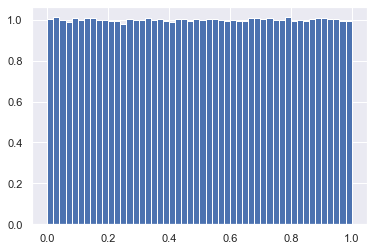

In [20]:
y = 1 - np.exp(-2*x)

plt.hist(y, density = True, bins = 50);

## Упражнение

Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

In [43]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)

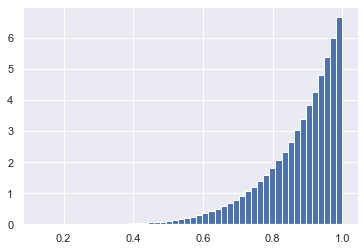

In [44]:
x = y**(1/7)
plt.hist(x, density = True, bins = 50);

Работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

<!-- ![image.png](attachment:image.png) 
 -->
<center>
<img src="images/image.png" height="200"> 
</center>

# 1. Проклятье размерности 

> Объём данных, необходимый для надёжного результата растёт с увеличением размерности экспоненциально.

Предположим, что у нас есть $50$ точек с отрезка от $0$ до $100$. Посмотрим сколько точек для расчётов будет приходиться на каждую из ячеек длины $20$. 

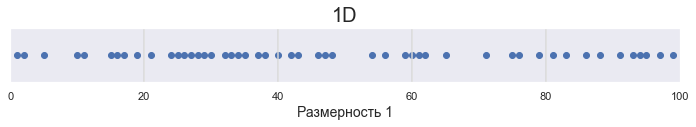

In [45]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.zeros_like(x)

plt.figure(figsize=(12, 1))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    
plt.xlim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("")
plt.yticks([], [])
plt.title("1D", fontsize=20);

Если нам нужно анализировать попадание случайной величины в каждый из пяти интервалов, у нас в среднем есть $\frac{50}{5} = 10$ наблюдений на одну ячейку. __Посмотрим на двумерный случай.__

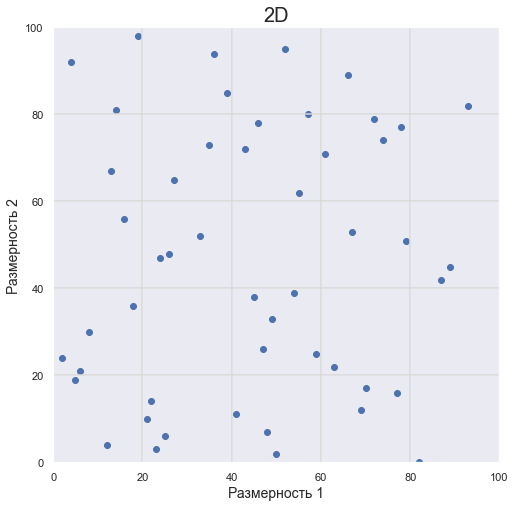

In [48]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)

plt.figure(figsize = (8, 8))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("Размерность 2", fontsize=14)
plt.title("2D", fontsize=20);

У нас есть по $5$ интервалов в каждом измерении. Теперь на каждую ячейку приходится в среднем $\frac{50}{5 \cdot 5} = 2$ точки. Начинают возникать ячейки, в которых нам не хватает данных для работы. __Посмотрим на трёхмерный случай.__

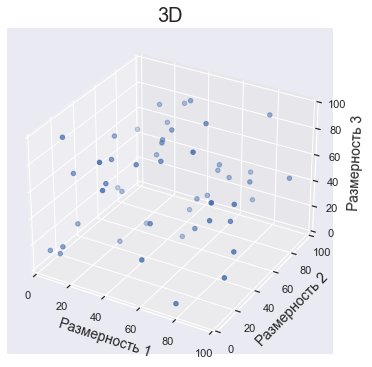

In [49]:
from mpl_toolkits import mplot3d

x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)
z = np.random.choice(range(0,100), size=50, replace=False)

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(x, y, z)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')
    
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Размерность 1", fontsize=14)
ax.set_ylabel("Размерность 2", fontsize=14)
ax.set_zlabel("Размерность 3", fontsize=14)
plt.title("3D", fontsize=20);

Появляется ещё $5$ интервалов на третьем измерении. В среднем на каждую ячейку мы получаем $\frac{50}{5 \cdot 5 \cdot 5} = 0.4$ наблюдения. 

__C каждой новой размерностью появляется новое пространство.__ Нам нужно заполнять его $\Rightarrow$ число симуляций, необходимых для устойчивых выводов экспоненциально увеличивается. 

- Для размерности $1$ нам надо покрыть точками $5$ ячеек
- Для размерности $2$ нам надо покрыть точками уже $5^2$ ячеек 
- Для размерности $3$ нам надо покрыть точками уже $5^3$ ячеек

Если мы сгенерируем для размерности $1$ $50$ точек, в среднем в каждой ячейке окажется по $10$. Для размерности $2$ для такого же результата нам уже понадобится $250$ точек. Для размерности $10$ нужно будет $97656250$ точек.

# 2. Вычисление числа $\pi$  

Попробуем с помощью генераций вычислить число $\pi$. Для начала найдём площадь окружности с радиусом $1$:

$$
x^2 + y^2 = 1.
$$

Можно поступить так: впишем окружность в квадрат $(0,0):(1,1)$, сгенерируем несколько точек в этом квадрате.

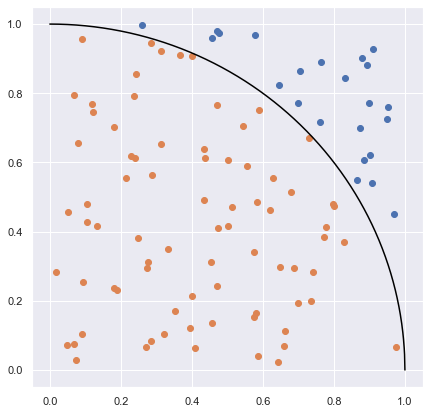

In [21]:
n_obs = 100

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl]);

Заметим, что только часть точек попала в окружность. Доля точек, лежащих внутри равна площади окружности. Чтобы точнее найти площадь, увеличим число генераций.

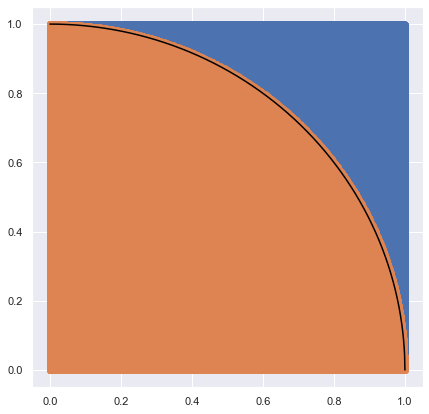

In [57]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl]);

In [58]:
np.mean(x**2 + y**2 <= 1) # вероятность попасть в четверть окружности (её площадь)

0.785643

$$S = \frac{1}{4} \cdot \pi R^2 \Rightarrow \pi = 4 \cdot S $$

In [59]:
4*np.mean(x**2 + y**2 <= 1)

3.142572

In [60]:
np.pi

3.141592653589793

Получили число $\pi$. Чем больше симуляций мы сделаем, тем точнее оно будет. 

Теперь попробуем получить его же, используя вместо окружности шар. Объём восьмой части шара можно посчитать по формуле: 

$$ V = \frac{1}{8} \cdot \frac{4}{3} \cdot \pi \cdot R^3 \Rightarrow \pi = 8 \cdot \frac{3}{4} \cdot V $$

In [61]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)
z = np.random.uniform(0, 1, size=n_obs)

8 * 3/4 * np.sum(x**2 + y**2 + z**2 <= 1)/n_obs

3.134982

Точность при том же числе генераций оказалась ниже. Теперь попробуем сделать то же самое, используя шар в $d$-мерном пространстве. Для его объёма можно получить формулу

$$
V = \frac{\pi^{\tfrac{d}{2}}}{\Gamma \left( \frac{d}{2}  + 1\right)} \cdot R^d,
$$

где $\Gamma(t)$ - гамма-функция. Она обобщает понятие факториала для непрерывного случая. Выразим число $\pi$

$$
\pi = \left(V \cdot \Gamma \left( \frac{d}{2} + 1 \right) \right)^\frac{2}{d}.
$$

In [62]:
from scipy.special import gamma

def find_pi(ndim, n_obs = 10**6):
    
    # сгенерировали точки
    x = [np.random.uniform(0, 1, size=n_obs) for _ in range(ndim)]

    dist = np.zeros(n_obs) # считаем расстояние от начала координат до точки
    for item in x:
         dist += item**2 
         
    V = np.sum(dist <= 1)/n_obs  # объём фигуры
    
    # 2**ndim из-за того, что мы всегда смотрим на кусочек фигуры (1/4 окружности, 1/8 шара и тд)
    pi = (2**ndim * V * gamma((ndim/2)+1))**(2/ndim) 
    return pi

In [63]:
find_pi(ndim=2)

3.142236

In [64]:
find_pi(ndim=3)

3.13858883305956

In [65]:
find_pi(ndim=4)

3.1422896110957055

Попробуем посмотреть как мы будем приближаться к числу $\pi$ в зависимости от размерности пространства, в котором происходят симуляции. 

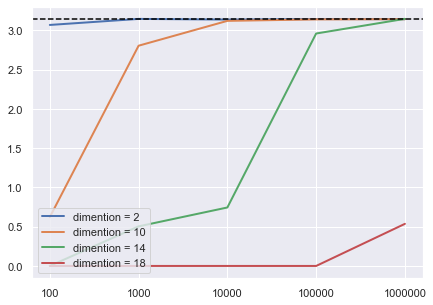

In [66]:
plt.figure(figsize=(7,5))

n_sim = [10**i for i in range(2, 7)]
dim = [2, 10, 14, 18]

for d in dim:        # размерность 
    cur_res = [ ]
    
    for n in n_sim:  # число симуляций
        pi = [ ]
        
        for _ in range(20):            # каждый эксперимент проводим 20 раз 
            pi.append(find_pi(d, n))   # и усредняем результат
            
        cur_res.append(np.mean(pi))

    plt.plot(range(2, 7), cur_res, label=f'dimention = {d}', lw=2)

plt.axhline(y=np.pi, color='black', linestyle='--')
plt.xticks(np.arange(2, len(n_sim)+2), n_sim)
plt.legend(loc='lower left');

По оси $x$ отложено число симуляций, по оси $y$ приближение числа $\pi$. Каждая траектория - приближение числа $\pi$ при разных размерностях пространства для симуляций. __Для более высоких размерностей требуетмя на порядок больше точек, чтобы получить число $\pi$ с высокой точностью.__

### Резюме: 

При работе с генерациями могут возникать проблемы: 

- Сложности при генерации многомерных случайных величин (проклятье размерности)
- Сложности связанные с генерацией независимых случайных величин
- Сложности связанные со сходимостями последовательностей случайных величин не к тому распределению


# Метод Моментов

Суть метода: выразить числовые параметры теоретического распределения через моменты распределения, оценненные по выборки. Число моментов должно соответствовать числу неизвестных параметров распределения (чаще всего используют первые два момента). После вычисления приравниваем теоретические и выборочные моменты друг к другу и выражаем оценки параметров.

Данный метод прост в в реализации, дает неплохие оценки и удобен для отработки навыков. Про свойства оценок: **состоятельность** оценок выполняется при непрерывной зависимости от параметра, **асимптотическая эффективность** оценок, полученных по ММП всегда лучше чем у ММ, оценки по ММ чаще всего смещенные (требуется проверка).

$X_1, \dots, X_n, \dots$ - одинаково независимо распределенные случайные величины - $(iid)$

Момент $E(X_i^k)$ зависит от неизместного параметра $\theta$:
    
$$E(X_i^k) = f(\theta)$$

Оценка параметра $\theta$ методом моментов называется случайная величина

$$\hat{\theta}_{ММ} = f^{-1}(\overline{X^k})$$

То есть оценка получается решением уравнения:

$$E(X_i^k, \theta) \approx \frac{\sum x^k_i}{n}$$

## Но что есть параметров несколько?

Если у исследуемого распределения несколько параметров, используют несколько моментов:


$$ X_1, \dots, X_n, \dots ~ iid N(\mu, \sigma^2)$$

Тогда если нужно оценить оба параметра: Дисперсию и математическое ожидание, используем два момента:


$$
F(x) = \begin{cases}
E(X_i) \approx \stackrel{-}{x} \\ 
E(X_i^2) \approx \stackrel{-}{x^2} \\ 
\end{cases}
$$
  
  
$$
< = >\begin{cases}
\mu = \stackrel{-}{x} \\ 
\sigma^2 + \mu^2 = \stackrel{-}{x^2} \\ 
\end{cases}
$$


$$
< = > \begin{cases}
\hat{\mu} = \stackrel{-}{x} \\ 
\hat{\sigma^2} = \stackrel{-}{x^2} - \stackrel{-}{x}^2 \\ 
\end{cases}
$$


## Резюме и выводы:

* Метод моментов позволяем оценить параметр неизвестного распределения по выборке


* **Перед тем, как использовать метод моментов, мы должны предположить, из какого распределения выбрка была получена**


* Обычно для оценки достаточно первого момента


* **Если у распределения есть несколько параметров, используют несколько моментов (пример выше)**

# Характеристики оценок

# Несмещенность

Оценка называется несмещенной,если её мат. ожидание равное оцениваемому параметру:
    
$$E(\hat{\theta})=\theta$$

Смещение оценки это разница между её математическим ожиданием и её реальным значением:

$$bias(\hat{\theta})=E(\hat{\theta})-\theta$$


**Простым языком:** - если при фиксированном $n$ мы постоянно используем нашу оценку, то в среднем мы не ошибаемся

## Визуально несмещенность выглядит так:

<center>
<img src="images/unshift.png" height="50"> 
</center>

# Состоятельность

Оценка называется **состоятельной**, если она сходится по вероятности к истинному значения параметра при $n$ стремящимся в бесконечность

$$
\hat{\theta} \overset{p}{\to} \theta
$$

**Простым языком:** чем больше наблюдений ($n$), тем мы ближе к истине

<center>
<img src="images/sostoatelnost.png" height="50"> 
</center>


<center>
<img src="images/sostoatelnost_2.png" height="50"> 
</center>


# Ассимптотическая несмещенность

Оценка называется **ассмптотически несмещенной**, если её математическое ожидание сходится к оцениваемому параметру при $n$ стремящимся в бесконечность. 

$$
E(\hat{\theta}) \overset{}{\to} \theta
$$

**Простым языком:** если мы постоянно используем нашу оценку, то в среднем при больших $n$ мы не ошибаемся

<center>
<img src="images/assimptot_unshift.PNG" height="50"> 
</center>
